# 问题情境

我们在向别人推销数据挖掘时，通常我们都会说数据挖掘能“发现数据背后的规律”，并且经常是“意想不到的、新奇的”规律。通常会举啤酒和尿布的例子——啤酒与尿布的故事，或许是有史以来推销数据挖掘最好的广告之一!<br>
<img src=figtabs/ch4/beer_diapers.png align=center width=75% height=75% />

故事有多个版本，其中一个版本是：<br>
沃尔玛在美国的一家分店发生过这样一件趣事:在一个夏季，管理者发现在那段时间里婴儿尿布和啤酒的销量次第拔高。这如果在一般的商店也许就会被忽略，但沃尔玛超市的管理者没有轻易放过。他们立即对这个现象进行了分析和讨论，并且派出了专门的队伍在卖场内进行全天候的观察。最后，谜底终于水落石出：原来，购买这两种产品的顾客一般都是年龄在25至35周岁的青年男子，由于孩子尚在哺乳期，所以每天下班后他们都会遵太太的命令到超市里为孩子购买婴儿纸尿裤，每当这个时候，他们大都会为自己顺带买回几瓶啤酒。<br>
沃尔玛的管理者立即针对此现象采取了行动：将卖场内原来相隔很远的妇婴用品区与酒类饮料区的空间距离拉近，减少顾客的行走时间。

尽管啤酒和尿布的故事是杜撰的，但是通过数据来挖掘事物之间的关联关系，却在很多场合都有应用，比如：<br>
<img src=figtabs/ch4/jd_recommendation.png align=center width=75% height=75% />

又比如：<br>
<img src=figtabs/ch4/EI_village_recommendation.png align=center width=75% height=75% />

🌈🌈🌈🌈  **Time to Play**  ✨✨✨✨

> 挖出什么样的关系结构，才能实现上述效果？

实际的数据，一般长下边这个样子：

<img src=figtabs/ch4/arules_1.png align=center width=50% height=50% />

○和×之间有怎样的推导关系？

关联分析旨在事务、关系数据库中的项集和对象中发现频繁模式、伴随过程、相依性、相关性乃至可能的因果结构。关联分析虽然通常被称之为购物篮分析，但其应用场景已经远远超出了“购物”的范畴：<br>
* 购物篮分析（优化货架商品摆放、优化邮寄商品目录的内容、交叉销售和捆绑销售、……）
* web分析
* 生物信息学（DNA对新药敏感性分析）
* 地球科学
* ……<br>

本实验将以电影推荐为例，简述关联规则的原理及其应用。

# Apriori算法原理回顾

关联分析（Association Analysis）用于发现隐藏在大型数据集中有意义的联系，所发现的联系可以用频繁项集或关联规则的形式表示<br>
* 频繁项集（frequent item sets）是经常出现在一块的物品的集合
* 关联规则（association rules），形如$A \Rightarrow B$的蕴含式，$A$发生的情况之下，$B$可能也伴随发生，暗示两种物品之间可能存在很强的关系。


以下是一些基本概念：  

* 项item的集合称为项集itemset
* 包含k个项的项集称为k-项集
* 项集出现的频度是包含该项集的事务数，简称为项集的频度、支持度计数
* 如果项集的支持度满足预定义的最小支持度阈值，称之为频繁项集frequent itemset  



关联规则是一个蕴涵式：𝐴⇒𝐵，其中𝐴和𝐵是不相交的项集  
具体含义是：𝐴出现的时候，𝐵也出现；或者说，𝐵伴随着𝐴出现  
关联规则在事务集𝑇中成立，所具有支持度和置信度：  
* 一个项集的支持度（support）被定义为数据集中包含该项集的记录所占的比例：$support\left( {A \Rightarrow B} \right) = P\left( {A \cup B} \right)$
* 置信度则是针对规则来定义的：$confidence\left( {A \Rightarrow B} \right) = P\left( {B|A} \right) = \frac{{P\left( {A \cup B} \right)}}{{P\left( A \right)}} = \frac{{support\_count\left( {A \cup B} \right)}}{{support\_coun\left( A \right)}}$

* **支持度**：减少偶然性  
* **置信度**：增加推断能力  
* 满足最小支持度和置信度的规则称为强规则


除了支持度和置信度之外，提升度也是常用的一个指标：  
**提升度**：  
$lift\left( {A \Rightarrow B} \right) = \frac{{P\left( {A \cup B} \right)}}{{P\left( A \right)P\left( B \right)}}$

$lift\left( {A \Rightarrow B} \right) = \frac{{P\left( {A|B} \right)}}{{P\left( A \right)}}$

* 如果提升度小于1，则A的出现和B的出现是负相关的，意味着一个出现可能导致另一个不出现
* 如果提升度大于1，则A的出现和B的出现是正相关的，意味着一个出现蕴含另一个的出现
* 换言之，它评估一个的出现“提升”另一个出现的程度

PS:可能有小伙伴会觉得这里的并集符号$ \cup $是不是用错了？和想象的不一样啊，这不应该是交集么？从事件的角度看，当然是交集，并且我们以前在学习概率论与梳理统计时，确实也习惯了使用事件的概念。不过这里的A和B是项集，自然$A \cup B$相当于A项集出现的事件和B项集出现的事件的交集了

🌈🌈🌈🌈  **Time to Play**  ✨✨✨✨

请分别计算以下两条规则的的支持度、置信度和提升度：  
* $\bigcirc  \Rightarrow {\rm{ \times }}$
* $\times  \Rightarrow {\rm{ \bigcirc }}$

Apriori算法的核心思想是利用先验规则：<br>
* 频繁项集的所有非空子集也一定是频繁的
* 非频繁项集的超集必定是非频繁的<br>
<img src=figtabs/ch4/freq_itemset_prune.png align=center width=75% height=75%>

算法过程可表述如下：<br>
<img src="figtabs/ch4/apriori_part_a.png" height=75% width=75% align=left />

<img src=figtabs/ch4/ck_gen.png align=center width=75% height=75%>

由频繁的$k-1$项集，生成频繁的$k$项集候选，有多种办法：<br>   

| 方法名称 | 方法描述 |
| :------: | :------ |
| 蛮力方法 | 把所有的$k$项集都看作可能的候选集，然后再剪枝 |
| 连接方法一 | 用其他频繁项集来扩展每个频繁$(k-1)$项集 |
| 连接方法二 | 合并一对$(k-1)$项集，当且仅当他们前$k-1$项都相同 |

<img src=figtabs/ch4/apriori_part_b.png align=left width=75% height=75% />

完成了频繁项集的挖掘，只是完成了关联规则挖掘两个步骤中的第一步：<br>
* （1）找出所有频繁项集，满足最小支持度
* （2）由频繁项集产生强关联规则，满足最小置信度

---

避免野蛮搜索：<br>
* （1）基于支持度对候选集进行剪枝
* （2）基于置信度对规则进行剪枝

---

如果$X \Rightarrow (Y - X)$不满足置信度阈值，则对于${X^{sub}} \subset X$的规则${X^{sub}} \Rightarrow Y - {X^{sub}}$也一定不满足置信度阈值!

<img src=figtabs/ch4/rule_prune.png align=center width=75% height=75%>

# 数据导入

## 数据源

MovieLens 是历史最悠久的推荐系统。它由美国 Minnesota 大学计算机科学与工程学院的 GroupLens 项目组创办，是一个非商业性质的、以研究为目的的实验性站点。MovieLens 主要使用 Collaborative Filtering 和 Association Rules 相结合的技术，向用户推荐他们感兴趣的电影。

自打Netflix Prize奖项设立以来，美国明尼苏达大学的Grouplens研究团队公开了一系列用于测试推荐算法的数据集,包含多个用户对多部电影的评级数据，也包括电影元数据信息和用户属性信息。  这个数据集经常用来做推荐系统，机器学习算法的测试数据集。尤其在推荐系统领域，很多著名论文都是基于这个网站提供的数据集。   

MovieLens提供的电影评分数据集包含多个版本，如MovieLens 20M Dataset、MovieLens 100K Dataset、MovieLens 1M Dataset、MovieLens 10M Dataset、MovieLens Latest Datasets等多个版本，其中MovieLens Latest Datasets更新至2018年9月（Accessed on 2/17/2019）。  
本实验将采用MovieLens 10M Dataset，数据集下载地址为：<http://grouplens.org/datasets/movielens/>。

<img src=figtabs/ch4/movielens_10m_url.png align=center width=50% height=50% />

当然，也可以直接进入[Permalink](http://grouplens.org/datasets/movielens/10m/)下载。  

关于这份数据即的信息，可参看相应的[文档](http://files.grouplens.org/datasets/movielens/ml-100k-README.txt)
> u.data     -- The full u data set, 100000 ratings by 943 users on 1682 items.  
>              Each user has rated at least 20 movies.  Users and items are  
>              numbered consecutively from 1.  The data is randomly  
>              ordered. This is a tab separated list of   
>	         user id | item id | rating | timestamp.   
>              The time stamps are unix seconds since 1/1/1970 UTC     
> u.item     -- Information about the items (movies); this is a tab separated  
>              list of  
>              movie id | movie title | release date | video release date |  
>              IMDb URL | unknown | Action | Adventure | Animation |  
>              Children's | Comedy | Crime | Documentary | Drama | Fantasy |  
>              Film-Noir | Horror | Musical | Mystery | Romance | Sci-Fi |  
>              Thriller | War | Western |  
>              The last 19 fields are the genres, a 1 indicates the movie  
>              is of that genre, a 0 indicates it is not; movies can be in  
>              several genres at once.  
>              The movie ids are the ones used in the u.data data set.  

## 准备工作

导入相关模块：

In [1]:
import os
import sys
import pandas as pd

In [2]:
#在Jupyter中，除非加上print，每个cell只会显示最后一个输出结果
#通过加上如下代码，使之打印所有的交互式输出，而不仅仅是最后一个
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import warnings
warnings.filterwarnings('ignore')

## 数据导入

下载完成后，解压缩至datasets文件夹，并通过以下代码进行解析。

In [3]:
os.getcwd()

'D:\\wd\\Python\\T01_edu\\Y02_DataMiningExperiments'

In [4]:
data_folder = os.path.join("datasets", "ml-100k")
data_folder
os.path.abspath(data_folder)
ratings_filename = os.path.join(data_folder, "u.data")
ratings_filename
os.path.abspath(ratings_filename)

'datasets\\ml-100k'

'D:\\wd\\Python\\T01_edu\\Y02_DataMiningExperiments\\datasets\\ml-100k'

'datasets\\ml-100k\\u.data'

'D:\\wd\\Python\\T01_edu\\Y02_DataMiningExperiments\\datasets\\ml-100k\\u.data'

MovieLens数据集非常规整，但是有几点跟 pandas.read_csv 方法的默认设置有出入，所以要调整参数设置  
* 数据集每行的几个数据之间用制表符而不是逗号分隔
* 没有表头，这表示数据集的第一行就是数据部分，我们需要手动为各列添加名称  

加载数据集时，把分隔符设置为制表符，告诉pandas不要把第一行作为表头（ header=None ），设置好各列的名称。代码如下：

In [5]:
%%time
all_ratings = pd.read_csv(
    ratings_filename,
    delimiter="\t",
    header=None,
    names=["UserID", "MovieID", "Rating", "Datetime"],
)

Wall time: 121 ms


In [6]:
all_ratings.to_csv(os.path.join(data_folder, "u.data.csv"))

import feather

feather.write_dataframe(all_ratings, "D://desktop/all_ratings.feather")

查看一下所读入的数据：

In [7]:
all_ratings.shape

(100000, 4)

In [8]:
all_ratings.head(n=10)

,UserID,MovieID,Rating,Datetime
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
5,298,474,4,884182806
6,115,265,2,881171488
7,253,465,5,891628467
8,305,451,3,886324817
9,6,86,3,883603013


In [9]:
all_ratings.tail()

,UserID,MovieID,Rating,Datetime
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156
99999,12,203,3,879959583


从其中抽取一部分样本：

In [10]:
all_ratings.sample(n=20, random_state=2012)

,UserID,MovieID,Rating,Datetime
64160,826,174,5,885690481
40742,616,272,5,891224517
3677,328,519,5,885046420
45233,163,305,2,891219977
60627,41,56,4,890687472
96581,820,347,4,887954853
63158,734,165,3,891025393
17630,158,516,5,880135044
52681,703,258,4,875242076
24723,499,347,4,885597932


In [11]:
all_ratings.sample(frac=20/100000, random_state=2012)

,UserID,MovieID,Rating,Datetime
64160,826,174,5,885690481
40742,616,272,5,891224517
3677,328,519,5,885046420
45233,163,305,2,891219977
60627,41,56,4,890687472
96581,820,347,4,887954853
63158,734,165,3,891025393
17630,158,516,5,880135044
52681,703,258,4,875242076
24723,499,347,4,885597932


如果是设置同样的random_state，结果应该是一样的

显然，这里的日期有误，需要进行解析：

In [12]:
all_ratings["Datetime"] = pd.to_datetime(all_ratings["Datetime"], unit="s")
all_ratings.head(n=10)

,UserID,MovieID,Rating,Datetime
0,196,242,3,1997-12-04 15:55:49
1,186,302,3,1998-04-04 19:22:22
2,22,377,1,1997-11-07 07:18:36
3,244,51,2,1997-11-27 05:02:03
4,166,346,1,1998-02-02 05:33:16
5,298,474,4,1998-01-07 14:20:06
6,115,265,2,1997-12-03 17:51:28
7,253,465,5,1998-04-03 18:34:27
8,305,451,3,1998-02-01 09:20:17
9,6,86,3,1997-12-31 21:16:53


或改用下边的实现方式：

In [13]:
def to_datetime(x):
    return pd.to_datetime(x, unit="s")

In [14]:
all_ratings = pd.read_csv(
    ratings_filename,
    delimiter="\t",
    header=None,
    names=["UserID", "MovieID", "Rating", "Datetime"],
    converters={"Datetime":to_datetime}
)

In [15]:
all_ratings.tail()

,UserID,MovieID,Rating,Datetime
99995,880,476,3,1997-11-22 05:10:44
99996,716,204,5,1997-11-17 19:39:03
99997,276,1090,1,1997-09-20 22:49:55
99998,13,225,2,1997-12-17 22:52:36
99999,12,203,3,1997-11-19 17:13:03


In [16]:
all_ratings.shape

(100000, 4)

In [17]:
all_ratings.values[:3, :]

array([[196, 242, 3, Timestamp('1997-12-04 15:55:49')],
       [186, 302, 3, Timestamp('1998-04-04 19:22:22')],
       [22, 377, 1, Timestamp('1997-11-07 07:18:36')]], dtype=object)

数据集是一个10万×4的一个DataFrame，有10万行评分记录，4列具体属性为：用户ID、电影ID、评分、日期。
MovieLens网站对该数据集的描述如下：
> This data set consists of:
>	* 100,000 ratings (1-5) from 943 users on 1682 movies. 
>	* Each user has rated at least 20 movies. 
>  * Simple demographic info for the users (age, gender, occupation, zip)

>The data was collected through the MovieLens web site
>(movielens.umn.edu) during the seven-month period from September 19th, 
>1997 through April 22nd, 1998. 

看看有多少用户：

In [18]:
len(all_ratings["UserID"].unique())

943

看看有多少部电影：

In [19]:
len(all_ratings["MovieID"].unique())

1682

查看数据的基本信息：

In [20]:
all_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   UserID    100000 non-null  int64         
 1   MovieID   100000 non-null  int64         
 2   Rating    100000 non-null  int64         
 3   Datetime  100000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(3)
memory usage: 3.1 MB


In [21]:
all_ratings.describe()

,UserID,MovieID,Rating
count,100000.00000,100000.000000,100000.000000
mean,462.48475,425.530130,3.529860
std,266.61442,330.798356,1.125674
min,1.00000,1.000000,1.000000
25%,254.00000,175.000000,3.000000
50%,447.00000,322.000000,4.000000
75%,682.00000,631.000000,4.000000
max,943.00000,1682.000000,5.000000


In [22]:
all_ratings.dtypes

UserID               int64
MovieID              int64
Rating               int64
Datetime    datetime64[ns]
dtype: object

In [23]:
import pandas_profiling
profie = pandas_profiling.ProfileReport(all_ratings)
profie.to_file("D://desktop/all_ratings_profiel.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

以上结果与网站描述一致。

In [24]:
from IPython.display import IFrame
IFrame('https://grouplens.org/datasets/movielens/10m/', width=600, height=400)

In [25]:
all_ratings.sort_values(by=["MovieID", "UserID"], ascending=False)

,UserID,MovieID,Rating,Datetime
95376,916,1682,3,1997-11-29 23:22:35
92329,896,1681,3,1998-02-11 01:32:02
80394,863,1680,2,1998-03-07 16:52:50
67302,863,1679,3,1998-03-07 16:51:31
75323,863,1678,1,1998-03-07 16:52:50
...,...,...,...,...
18504,10,1,4,1997-10-26 18:01:17
54487,6,1,4,1997-12-31 20:17:58
1333,5,1,4,1997-09-30 16:09:08
26184,2,1,4,1998-02-27 03:41:11


# 数据预处理

数据挖掘的目标是生成如下形式的规则：**如果用户喜欢某些电影，那么他们也会喜欢这部电影。**为此，先增加一列Favorable，来表示用户是否喜欢这部电影。

In [26]:
all_ratings["Favorable"] = all_ratings["Rating"] > 3
all_ratings.tail()

,UserID,MovieID,Rating,Datetime,Favorable
99995,880,476,3,1997-11-22 05:10:44,False
99996,716,204,5,1997-11-17 19:39:03,True
99997,276,1090,1,1997-09-20 22:49:55,False
99998,13,225,2,1997-12-17 22:52:36,False
99999,12,203,3,1997-11-19 17:13:03,False


In [27]:
all_ratings.UserID.max()

943

In [28]:
all_ratings.values

array([[196, 242, 3, Timestamp('1997-12-04 15:55:49'), False],
       [186, 302, 3, Timestamp('1998-04-04 19:22:22'), False],
       [22, 377, 1, Timestamp('1997-11-07 07:18:36'), False],
       ...,
       [276, 1090, 1, Timestamp('1997-09-20 22:49:55'), False],
       [13, 225, 2, Timestamp('1997-12-17 22:52:36'), False],
       [12, 203, 3, Timestamp('1997-11-19 17:13:03'), False]],
      dtype=object)

从数据集中选取一部分数据用作训练集，这能有效减少搜索空间，提升Apriori算法的速度。我们取前200名用户的打分数据。

In [29]:
topN = 943 #后续挖掘时速度可能会很慢
topN = 200
ratings = all_ratings[
    all_ratings["UserID"].isin(range(topN))
]  # & ratings["UserID"].isin(range(100))]

In [30]:
ratings.shape

(19531, 5)

In [31]:
# We start by creating a dataset of each user's favourable reviews
favorable_ratings = ratings[ratings["Favorable"]]
favorable_ratings[:5]

,UserID,MovieID,Rating,Datetime,Favorable
16,122,387,5,1997-11-11 17:47:39,True
20,119,392,4,1998-01-30 16:13:34,True
21,167,486,4,1998-04-16 14:54:12,True
26,38,95,5,1998-04-13 01:14:54,True
28,63,277,4,1997-10-01 23:10:01,True


In [32]:
favorable_ratings.shape

(11043, 5)

In [33]:
favorable_ratings.UserID.unique()

array([122, 119, 167,  38,  63, 160, 157,   7,  10,  99,  25,  59,  87,
        42, 138,  60,  57, 189, 194, 178, 127,  11,  95,   8, 162,  62,
        28, 135,  90, 166, 168, 110,  58,  94,  44,  72,  13,  68, 172,
        19,  43,  80,  66, 130,   1, 181, 161, 148,  97,  83, 125, 151,
         6,  92,  36, 100,  85, 113, 158, 145,  23,  16, 154,  77, 187,
       170, 128, 184,  69,  18, 191, 142, 177,  21, 197, 180, 144,   5,
       174, 137, 111,  91,  96, 115,  73,  54, 117,  64,  45, 131, 192,
       193,  56,  79, 118, 171,  70, 173, 185, 150, 188,  48,  22, 165,
       134,   2,  49, 159, 146, 156,  37, 186, 108,  14,  65, 104,  89,
       109, 195,  24, 196, 198,  84, 152,  53,  26, 176, 106,  78, 175,
       199, 164,  76, 136,  82, 190,  29, 141, 112,   4, 121,  81, 116,
       147, 105,  34,  71, 182, 103,  31,  32, 101,   9,  30,  74, 140,
        67,  98,  12,  40,  52, 179, 123,  41, 126,  15,  47,  93,  61,
        50, 114, 183, 124,  75,  46, 143,  86, 133, 139, 155,  1

In [34]:
favorable_ratings.UserID.unique().ndim
favorable_ratings.UserID.unique().size
favorable_ratings.UserID.unique().shape

1

199

(199,)

In [35]:
favorable_reviews_by_users = dict((k, frozenset(v.values)) for k, v in favorable_ratings.groupby("UserID")["MovieID"])
len(favorable_reviews_by_users)

199

以上语句需要稍微展开一下。首先是其中的groupby

![img](figtabs/ch4/groupby.png)

上图原图来自：[超好用的 pandas 之 groupby](https://www.jianshu.com/p/42f1d2909bb6)

In [36]:
ratings.iloc[:5]

,UserID,MovieID,Rating,Datetime,Favorable
0,196,242,3,1997-12-04 15:55:49,False
1,186,302,3,1998-04-04 19:22:22,False
2,22,377,1,1997-11-07 07:18:36,False
4,166,346,1,1998-02-02 05:33:16,False
6,115,265,2,1997-12-03 17:51:28,False


In [37]:
ratings = all_ratings[
    all_ratings["UserID"].isin(range(1, topN+1))
]  # & ratings["UserID"].isin(range(100))]

In [38]:
len(ratings.UserID.unique())

200

In [39]:
ratings.shape

(19747, 5)

In [40]:
# We start by creating a dataset of each user's favourable reviews
favorable_ratings = ratings[ratings["Favorable"]]
favorable_ratings[:5]

,UserID,MovieID,Rating,Datetime,Favorable
12,200,222,5,1997-10-05 09:05:40,True
16,122,387,5,1997-11-11 17:47:39,True
20,119,392,4,1998-01-30 16:13:34,True
21,167,486,4,1998-04-16 14:54:12,True
26,38,95,5,1998-04-13 01:14:54,True


In [41]:
favorable_ratings.shape

(11207, 5)

In [42]:
favorable_reviews_by_users = dict(
    (k, frozenset(v.values)) for k, v in favorable_ratings.groupby("UserID")["MovieID"]
)
favorable_reviews_by_users[100]

frozenset({258,
           269,
           272,
           294,
           300,
           302,
           313,
           315,
           316,
           328,
           344,
           347,
           355,
           690,
           691,
           750,
           751,
           752,
           879,
           898,
           900,
           1235})

In [43]:
num_favorable_by_movie = ratings[["MovieID", "Favorable"]].groupby("MovieID").sum()
num_favorable_by_movie.sort_values("Favorable", ascending=False)[:5]

,Favorable
MovieID,
50,101
100,89
258,84
181,79
174,75


🌈🌈🌈🌈  **Time to Play**  ✨✨✨✨

> 能和算法部分的哪些概念结合起来？

当然，我们现在能看到的只是MovieID，不像电影名称看起来那么直观，可以直接从u.item中获取相关信息，然后进行合并

In [44]:
moive_info_columns = [
    "MovieID",
    "Title",
    "release_date",
    "video_release_date",
    "IMDb_URL",
    "unknown",
    "Action",
    "Adventure",
    "Animation",
    "Childrens",
    "Comedy",
    "Crime",
    "Documentary",
    "Drama",
    "Fantasy",
    "Film_Noir",
    "Horror",
    "Musical",
    "Mystery",
    "Romance",
    "Sci_Fi",
    "Thriller",
    "War",
    "Western",
]
movie_info_filename = os.path.join(data_folder, "u.item")
movie_info = pd.read_csv(
    movie_info_filename,
    delimiter="|",
    header=None,
    names=moive_info_columns,
    encoding="mac-roman",
)

In [45]:
movie_info.to_csv(os.path.join(data_folder, "u.item.csv"))

In [46]:
movie_info.head(n=10)

,MovieID,Title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Childrens,...,Fantasy,Film_Noir,Horror,Musical,Mystery,Romance,Sci_Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,6,Shanghai Triad (Yao a yao yao dao waipo qiao) ...,01-Jan-1995,NaN,http://us.imdb.com/Title?Yao+a+yao+yao+dao+wai...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,Twelve Monkeys (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Twelve%20Monk...,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7,8,Babe (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Babe%20(1995),0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8,9,Dead Man Walking (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Dead%20Man%20...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,10,Richard III (1995),22-Jan-1996,NaN,http://us.imdb.com/M/title-exact?Richard%20III...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


从unkonw开始直到最后一列，均是指电影的类型。我们需要用到的，只有MovieID和Title两列。以下是具体合并代码：

In [47]:
ratings = pd.merge(
    ratings[["UserID", "MovieID", "Rating", "Favorable"]],
    movie_info[["MovieID", "Title"]],
)

In [48]:
ratings.head()

,UserID,MovieID,Rating,Favorable,Title
0,196,242,3,False,Kolya (1996)
1,63,242,3,False,Kolya (1996)
2,154,242,3,False,Kolya (1996)
3,34,242,5,True,Kolya (1996)
4,35,242,2,False,Kolya (1996)


In [49]:
ratings.to_csv(os.path.join(data_folder, "u.data.item.csv"))

接下来，新建一个数据集，只包括用户喜欢某部电影的数据行。

In [50]:
favorable_ratings = ratings[ratings["Favorable"]]
favorable_ratings[:5]

,UserID,MovieID,Rating,Favorable,Title
3,34,242,5,True,Kolya (1996)
5,199,242,5,True,Kolya (1996)
7,1,242,5,True,Kolya (1996)
8,173,242,5,True,Kolya (1996)
9,14,242,4,True,Kolya (1996)


我们可以创建一个数据框，以便了解每部电影的影迷数量。

In [51]:
num_favorable_by_movie = ratings[["Title", "Favorable"]].groupby("Title").sum()
num_favorable_by_movie.sort_values("Favorable", ascending=False)[:6]

,Favorable
Title,
Star Wars (1977),101
Fargo (1996),89
Contact (1997),84
Return of the Jedi (1983),79
Raiders of the Lost Ark (1981),75
"Silence of the Lambs, The (1991)",71


In [52]:
from translate import Translator

In [53]:
tran = Translator(to_lang="chinese")
tran.translate('Star Wars')
tran.translate('Return of the Jedi')

'星際大戰'

'王者归来'

In [54]:
ratings.sample(20)

,UserID,MovieID,Rating,Favorable,Title
1733,160,23,5,True,Taxi Driver (1976)
18486,130,1089,2,False,Speed 2: Cruise Control (1997)
9884,116,50,3,False,Star Wars (1977)
2240,87,789,3,False,Swimming with Sharks (1995)
17989,179,902,1,False,"Big Lebowski, The (1998)"
9801,8,50,5,True,Star Wars (1977)
785,25,181,5,True,Return of the Jedi (1983)
9540,152,143,5,True,"Sound of Music, The (1965)"
8608,151,492,3,False,East of Eden (1955)
9899,9,50,5,True,Star Wars (1977)


通过图形展示，更加直观一点：

In [55]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [56]:
ratings["Title"].value_counts().head()

Star Wars (1977)               118
Contact (1997)                 116
Fargo (1996)                   105
Liar Liar (1997)               102
English Patient, The (1996)    100
Name: Title, dtype: int64

In [57]:
top_n = 15
ratings["Title"].value_counts().head(top_n)

Star Wars (1977)                  118
Contact (1997)                    116
Fargo (1996)                      105
Liar Liar (1997)                  102
English Patient, The (1996)       100
Return of the Jedi (1983)          98
Scream (1996)                      96
Twelve Monkeys (1995)              94
Independence Day (ID4) (1996)      94
Toy Story (1995)                   90
Chasing Amy (1997)                 87
Pulp Fiction (1994)                86
Air Force One (1997)               85
Raiders of the Lost Ark (1981)     83
Godfather, The (1972)              83
Name: Title, dtype: int64

<AxesSubplot:>

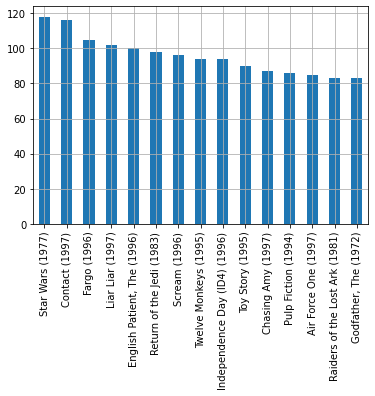

In [58]:
color = plt.cm.jet(np.linspace(1, 0, top_n))
ratings["Title"].value_counts().head(top_n).plot(kind="bar")
plt.grid()

In [59]:
import squarify

<AxesSubplot:>

(0.0, 100.0, 0.0, 100.0)

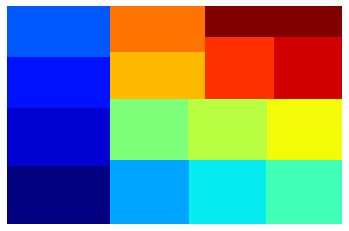

In [60]:
top_n = 15
y = ratings["Title"].value_counts().head(top_n).to_frame()
color = plt.cm.jet(np.linspace(0, 1, top_n))
squarify.plot(sizes=y.values, color=color)
plt.axis("off")

在生成项集时，需要搜索用户喜欢的电影。因此，接下来，我们需要知道每个用户各喜欢哪些电影，按照User ID进行分组，并遍历每个用户看过的每一部电影。

In [61]:
favorable_reviews_by_users_list = [
    list(v.values) for k, v in favorable_ratings.groupby("UserID")["Title"]
]

In [62]:
favorable_reviews_by_users_list[1:3]

[['Kolya (1996)',
  'L.A. Confidential (1997)',
  'Men in Black (1997)',
  'Restoration (1995)',
  'Fly Away Home (1996)',
  'Truth About Cats & Dogs, The (1996)',
  'Birdcage, The (1996)',
  'Sense and Sensibility (1995)',
  'Good Will Hunting (1997)',
  'Postino, Il (1994)',
  'Jerry Maguire (1996)',
  'English Patient, The (1996)',
  'Once Upon a Time... When We Were Colored (1995)',
  'Mrs. Brown (Her Majesty, Mrs. Brown) (1997)',
  'In & Out (1997)',
  "Ulee's Gold (1997)",
  'Tin Cup (1996)',
  'Rosewood (1997)',
  'Fargo (1996)',
  'Donnie Brasco (1997)',
  'Godfather, The (1972)',
  'Full Monty, The (1997)',
  'Star Wars (1977)',
  'Secrets & Lies (1996)',
  'Heat (1995)',
  'Shall We Dance? (1996)',
  'Mighty Aphrodite (1995)',
  'Toy Story (1995)',
  "My Best Friend's Wedding (1997)",
  'Hoodlum (1997)',
  'Time to Kill, A (1996)',
  'Air Force One (1997)',
  'Leaving Las Vegas (1995)',
  'As Good As It Gets (1997)',
  'Titanic (1997)',
  "Ulee's Gold (1997)",
  'Emma (1996)'

In [63]:
favorable_reviews_by_users = dict(
    (k, frozenset(v.values)) for k, v in favorable_ratings.groupby("UserID")["Title"]
)

上面的代码把 v.values 存储为 frozenset ，便于快速判断用户是否为某部电影打过分。对于这种操作，集合比列表速度快。

比如UserID为173的用户，他喜欢的电影如下：

In [64]:
favorable_reviews_by_users[173]

frozenset({'Air Force One (1997)',
           'Career Girls (1997)',
           'Chasing Amy (1997)',
           'Conspiracy Theory (1997)',
           'Contact (1997)',
           'Cop Land (1997)',
           "Dante's Peak (1997)",
           'Desperate Measures (1998)',
           "Devil's Own, The (1997)",
           'Edge, The (1997)',
           'English Patient, The (1996)',
           'Event Horizon (1997)',
           'Everyone Says I Love You (1996)',
           'Evita (1996)',
           'Full Monty, The (1997)',
           'G.I. Jane (1997)',
           'Hoodlum (1997)',
           'Ice Storm, The (1997)',
           'In & Out (1997)',
           'In the Company of Men (1997)',
           'Kiss Me, Guido (1997)',
           'Kiss the Girls (1997)',
           'Kolya (1996)',
           'L.A. Confidential (1997)',
           'Liar Liar (1997)',
           'Lost Highway (1997)',
           'Mother (1996)',
           'Mrs. Brown (Her Majesty, Mrs. Brown) (1997)',
           '

下面这种方式可能更好一点：

In [65]:
favorable_reviews_by_users.get(2)

frozenset({'Air Force One (1997)',
           'As Good As It Gets (1997)',
           'Birdcage, The (1996)',
           'Breakdown (1997)',
           'Donnie Brasco (1997)',
           'Emma (1996)',
           'English Patient, The (1996)',
           'Fargo (1996)',
           'Fly Away Home (1996)',
           'Full Monty, The (1997)',
           'Godfather, The (1972)',
           'Good Will Hunting (1997)',
           'Heat (1995)',
           'Hoodlum (1997)',
           'In & Out (1997)',
           'Jerry Maguire (1996)',
           'Kolya (1996)',
           'L.A. Confidential (1997)',
           'Leaving Las Vegas (1995)',
           'Men in Black (1997)',
           'Mighty Aphrodite (1995)',
           'Mrs. Brown (Her Majesty, Mrs. Brown) (1997)',
           "My Best Friend's Wedding (1997)",
           'Once Upon a Time... When We Were Colored (1995)',
           'Postino, Il (1994)',
           'Rainmaker, The (1997)',
           'Restoration (1995)',
           'Rosew

In [66]:
count = [len(value) for key, value in favorable_reviews_by_users.items()]

In [67]:
min(count)

3

In [68]:
max(count)

280

In [69]:
count.index(min(count))

154

由于拆分成了多个Notebook，因此需要在不同的Notebook之间传递对象

In [70]:
%store favorable_reviews_by_users_list
%store favorable_reviews_by_users
%store ratings

Stored 'favorable_reviews_by_users_list' (list)
Stored 'favorable_reviews_by_users' (dict)
Stored 'ratings' (DataFrame)


<!--NAVIGATION-->
< [数据挖掘常用模块B](ch03_数据挖掘常用模块B.ipynb) | [Contents](Index.ipynb) | [MovieLens电影推荐B](ch04_MovieLens电影推荐B.ipynb)  >